In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Ustawienia
np.random.seed(42)
TARGET_COLUMN_NAME = "Status"

df = pd.read_csv("./dataset/Loan_default.csv")
n_class = df[TARGET_COLUMN_NAME].nunique()

# Wybór kolumn
text_columns = ["loan_type", "loan_purpose", "credit_type", "co-applicant_credit_type", "age"]
float_columns = df.select_dtypes(include=["float64"]).columns.tolist()
df = df[text_columns + float_columns + [TARGET_COLUMN_NAME]]

# One-hot encoding dla kolumn tekstowych
df = pd.get_dummies(df, columns=text_columns)

# Konwersja wartości logicznych na liczby
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

df = df.fillna(0)

# Podział na cechy i etykiety
X = df.drop(columns=[TARGET_COLUMN_NAME])
y = df[TARGET_COLUMN_NAME]

# One-hot encoding dla etykiet
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(y.values.reshape(-1, 1))

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja cech
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("features", X_train.shape[1])

# Budowa modelu
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    # layers.Dropout(0.6),
    # layers.Dense(16, activation='relu'),
    layers.Dense(n_class, activation='softmax')
])

# Kompilacja modelu
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Trening modelu
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, min_delta=0.001, restore_best_weights=True)]
)

# Ocena modelu
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")


features 28
Epoch 1/10


c:\Users\Paulina\Desktop\test_actionsv2\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3717/3717 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9718 - loss: 0.0786 - val_accuracy: 1.0000 - val_loss: 1.9686e-04
Epoch 2/10
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 2.1095e-04 - val_accuracy: 1.0000 - val_loss: 3.0887e-05
Epoch 3/10
3717/3717 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 2.5015e-05 - val_accuracy: 1.0000 - val_loss: 1.2122e-04
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 2.0805e-04
Test accuracy: 1.0, Test loss: 0.0001968640135601163


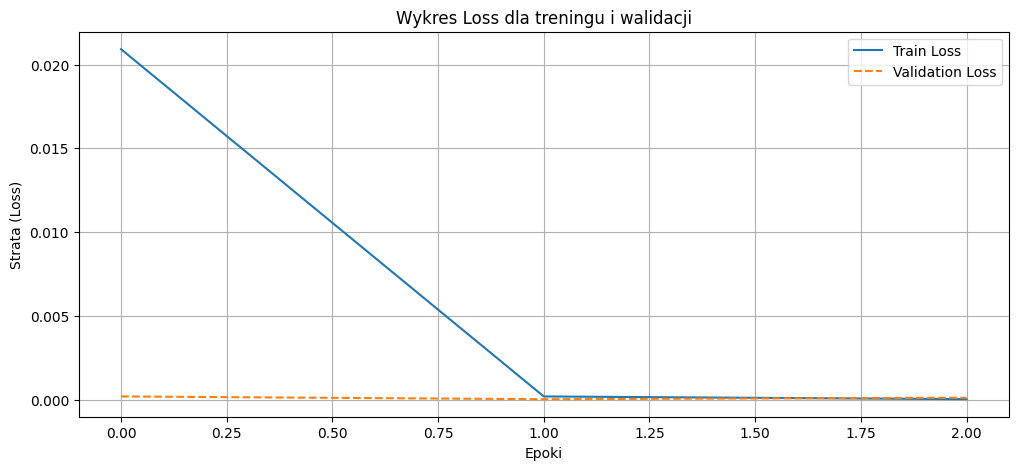

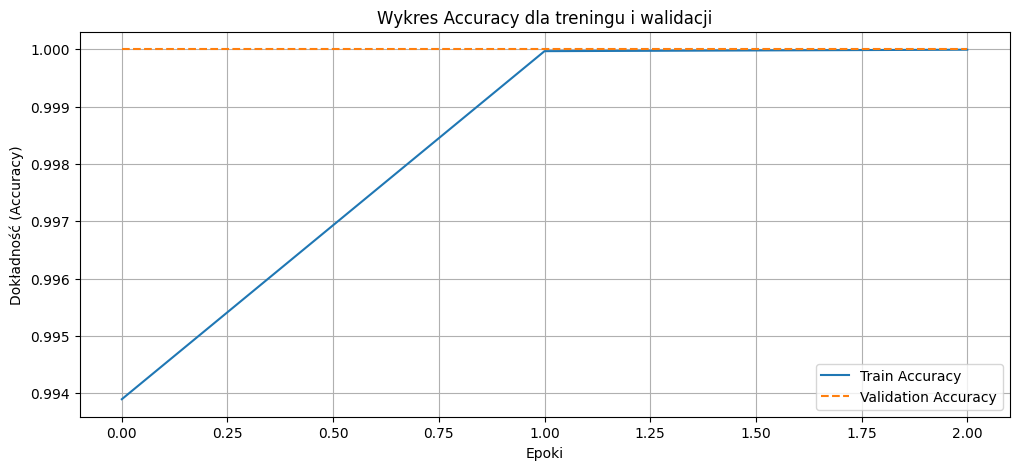

In [17]:
import matplotlib.pyplot as plt

history_data = history.history

# Wykres Loss
plt.figure(figsize=(12, 5))
plt.plot(history_data['loss'], label='Train Loss')
plt.plot(history_data['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epoki')
plt.ylabel('Strata (Loss)')
plt.title('Wykres Loss dla treningu i walidacji')
plt.legend()
plt.grid()
plt.show()

# Wykres Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epoki')
plt.ylabel('Dokładność (Accuracy)')
plt.title('Wykres Accuracy dla treningu i walidacji')
plt.legend()
plt.grid()
plt.show()

